<a href="https://colab.research.google.com/github/miguelgargallo/jupyter-notebook/blob/main/04-tensorflow-pirates-chatbot" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [32]:
#importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [33]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [34]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [35]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,morning,greeting
4,afternoon,greeting
5,evening,greeting
6,bye,goodbye
7,goodbye,goodbye
8,later,goodbye
9,catch you,goodbye


In [36]:
data = data.sample(frac=1)

In [37]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
14,can you,help
25,feeling stressed,feelings
20,where,location
5,evening,greeting
0,hello,greeting
23,feeling depressed,feelings
24,feeling anxious,feelings
21,feeling down,feelings
1,hi,greeting
6,bye,goodbye


In [38]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [39]:
input_shape = x_train.shape[1]
print(input_shape)

3


In [40]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  29
output length:  6


In [41]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [42]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [43]:
#training the model
train = model.fit(x_train,y_train,epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 1.7904 - accuracy: 0.2308
Epoch 2/400
1/1 [==============================] - 0s 7ms/step - loss: 1.7895 - accuracy: 0.3077
Epoch 3/400
1/1 [==============================] - 0s 6ms/step - loss: 1.7887 - accuracy: 0.3077
Epoch 4/400
1/1 [==============================] - 0s 6ms/step - loss: 1.7878 - accuracy: 0.3462
Epoch 5/400
1/1 [==============================] - 0s 6ms/step - loss: 1.7870 - accuracy: 0.3077
Epoch 6/400
1/1 [==============================] - 0s 6ms/step - loss: 1.7861 - accuracy: 0.3846
Epoch 7/400
1/1 [==============================] - 0s 6ms/step - loss: 1.7852 - accuracy: 0.4615
Epoch 8/400
1/1 [==============================] - 0s 5ms/step - loss: 1.7843 - accuracy: 0.4615
Epoch 9/400
1/1 [==============================] - 0s 6ms/step - loss: 1.7834 - accuracy: 0.3846
Epoch 10/400
1/1 [==============================] - 0s 5ms/step - loss: 1.7825 - accuracy: 0.3846
Epoch 11/400
1/1 [============

1/1 [==============================] - 0s 5ms/step - loss: 1.6095 - accuracy: 0.5000
Epoch 85/400
1/1 [==============================] - 0s 5ms/step - loss: 1.6044 - accuracy: 0.5000
Epoch 86/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5992 - accuracy: 0.5000
Epoch 87/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5939 - accuracy: 0.5000
Epoch 88/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5885 - accuracy: 0.5000
Epoch 89/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5830 - accuracy: 0.5000
Epoch 90/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5773 - accuracy: 0.5000
Epoch 91/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5715 - accuracy: 0.5000
Epoch 92/400
1/1 [==============================] - 0s 5ms/step - loss: 1.5656 - accuracy: 0.5000
Epoch 93/400
1/1 [==============================] - 0s 6ms/step - loss: 1.5596 - accuracy: 0.5000
Epoch 94/400
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.9317 - accuracy: 0.8846
Epoch 168/400
1/1 [==============================] - 0s 6ms/step - loss: 0.9230 - accuracy: 0.8846
Epoch 169/400
1/1 [==============================] - 0s 5ms/step - loss: 0.9142 - accuracy: 0.8846
Epoch 170/400
1/1 [==============================] - 0s 6ms/step - loss: 0.9055 - accuracy: 0.8846
Epoch 171/400
1/1 [==============================] - 0s 5ms/step - loss: 0.8967 - accuracy: 0.8846
Epoch 172/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8880 - accuracy: 0.8846
Epoch 173/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8794 - accuracy: 0.8846
Epoch 174/400
1/1 [==============================] - 0s 5ms/step - loss: 0.8707 - accuracy: 0.8846
Epoch 175/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8621 - accuracy: 0.8846
Epoch 176/400
1/1 [==============================] - 0s 5ms/step - loss: 0.8535 - accuracy: 0.8846
Epoch 177/400
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.8846
Epoch 250/400
1/1 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8846
Epoch 251/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.8846
Epoch 252/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3770 - accuracy: 0.8846
Epoch 253/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3734 - accuracy: 0.8846
Epoch 254/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3698 - accuracy: 0.8846
Epoch 255/400
1/1 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.8846
Epoch 256/400
1/1 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.8846
Epoch 257/400
1/1 [==============================] - 0s 5ms/step - loss: 0.3593 - accuracy: 0.8846
Epoch 258/400
1/1 [==============================] - 0s 5ms/step - loss: 0.3558 - accuracy: 0.8846
Epoch 259/400
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.1727 - accuracy: 1.0000
Epoch 332/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1711 - accuracy: 1.0000
Epoch 333/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1695 - accuracy: 1.0000
Epoch 334/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1679 - accuracy: 1.0000
Epoch 335/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 1.0000
Epoch 336/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1649 - accuracy: 1.0000
Epoch 337/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1633 - accuracy: 1.0000
Epoch 338/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1619 - accuracy: 1.0000
Epoch 339/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1604 - accuracy: 1.0000
Epoch 340/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1589 - accuracy: 1.0000
Epoch 341/400
1/1 [=====

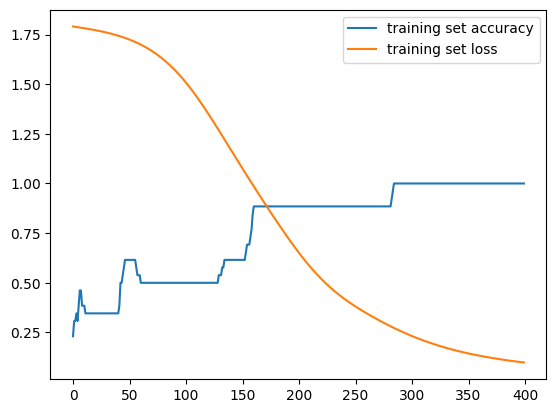

In [44]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [45]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Going Merry : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : hello
1/1 [==============================] - 0s 236ms/step
Going Merry :  Hey! How can I assist you?
You : i feel sad
1/1 [==============================] - 0s 13ms/step
Going Merry :  Absolutely! What kind of support do you need?
You : sad
1/1 [==============================] - 0s 14ms/step
Going Merry :  Absolutely! What kind of support do you need?
You : feeling
1/1 [==============================] - 0s 15ms/step
Going Merry :  Sure thing! What do you need help with?
You : goodbye
1/1 [==============================] - 0s 14ms/step
Going Merry :  Catch you later! Have a good one.
